<a href="https://colab.research.google.com/github/gaurav21s/Face-mask-detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = r'/content/drive/MyDrive/facemask/Train'
validation_dir = r'/content/drive/MyDrive/facemask/Validation'
test_dir =r'/content/drive/MyDrive/facemask/Test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.1,
      shear_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

80150528/80134624 [==============================] - 1s 0us/step


In [7]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [10]:
conv_base.trainable = False

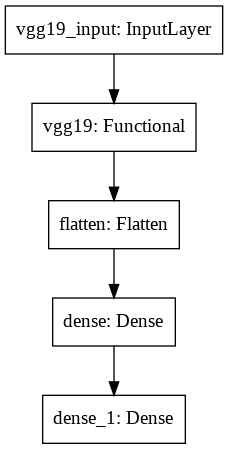

In [11]:
import pydot
keras.utils.plot_model(model)

In [21]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])

In [22]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5", save_best_only=True)

In [14]:
#steps_per_epoch=len(train_generator)//20

#steps_per_epoch

In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=40,
      callbacks=[checkpoint_cb])

Epoch 1/5
25/25 [==============================] - 79s 3s/step - loss: 0.2242 - acc: 0.9360 - val_loss: 0.1514 - val_acc: 0.9513
Epoch 2/5
25/25 [==============================] - 82s 3s/step - loss: 0.2019 - acc: 0.9320 - val_loss: 0.1333 - val_acc: 0.9613
Epoch 3/5
25/25 [==============================] - 68s 3s/step - loss: 0.1780 - acc: 0.9480 - val_loss: 0.1172 - val_acc: 0.9625
Epoch 4/5
25/25 [==============================] - 68s 3s/step - loss: 0.1738 - acc: 0.9440 - val_loss: 0.1145 - val_acc: 0.9650
Epoch 5/5
25/25 [==============================] - 60s 2s/step - loss: 0.1450 - acc: 0.9620 - val_loss: 0.1121 - val_acc: 0.9663


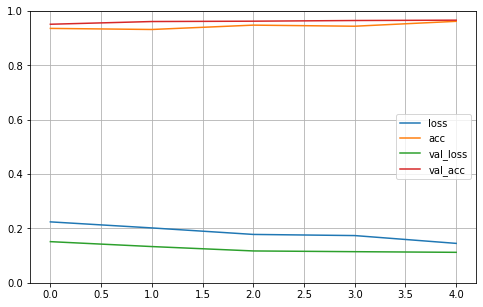

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 992 images belonging to 2 classes.


In [25]:
model.evaluate(test_generator, steps=50)

50/50 [==============================] - 8s 149ms/step - loss: 0.1493 - acc: 0.9446


[0.14928342401981354, 0.944556474685669]

In [26]:
model.save("facemask.h5")